# Análise de Componentes Principais (PCA): da teoria à prática

##Introdução

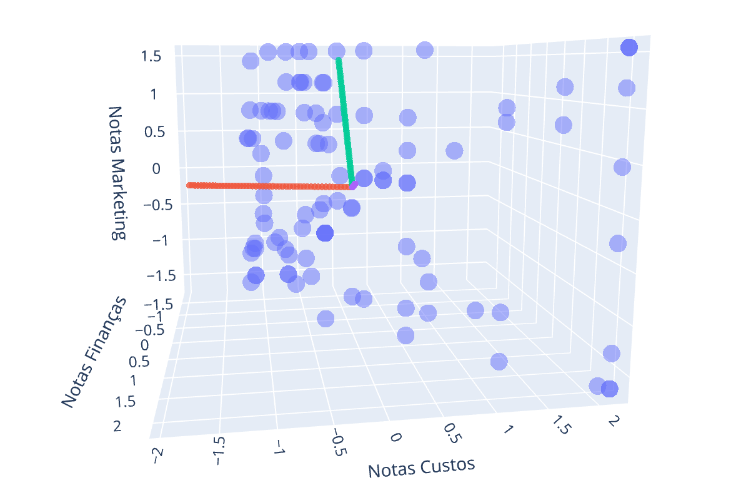


### Inicio
Análise de componentes principais (PCA) é uma técnica de redução de dados que encontra aplicação em uma ampla variedade de campos, incluindo biologia, sociologia, física, medicina e processamento de áudio. O PCA pode ser usado como uma etapa de processamento de "front end" que alimenta camadas adicionais de aprendizado de máquina ou pode ser usado sozinho, por exemplo, ao fazer a visualização de dados. 

## Ideia
Simplificando, o PCA envolve fazer uma transformação de coordenadas (ou seja, uma rotação) dos eixos arbitrários (ou "recursos") com os quais você começou para um conjunto de eixos 'alinhados com os próprios dados', e fazer isso quase sempre significa que você pode livrar-se de alguns desses 'componentes' de dados que têm pequena variação sem sofrer muito com a precisão enquanto economiza uma *tonelada* de computação.

Etapas:
1. Correlação: Encontre a matriz de correlação para seu conjunto de dados
2. Autovetores: Encontre os *autovetores* dessa matriz (estes são os "componentes")
3. Ordenação: Classifique os autovetores / 'dimensões' da maior para a menor variância
4. Projeção/redução de dados: Use os autovetores correspondentes à maior variação para projetar o conjunto de dados em um espaço dimensional reduzido
6. (Verificar: quanto perdemos com esse truncamento?)

# Ressalvas
Uma vez que o PCA envolverá fazer transformações lineares,
existem algumas situações em que o PCA não ajuda, mas ... basicamente é útil o suficiente para que valha a pena tentar!


##Estudo de Caso

Uma professora com 100 alunos aplica as matérias de Finanças, Custos, Marketing e Atuárias.

Após o fim do 1º semestre, ela deseja criar um ranking para verificar quais alunos vão precisar de ajuda em quais matérias e se uma nota ruim está ou não diretamente ligada a outra para preparar a turma no próximo semestre. Para isso vamos elaborar uma PCA nos passos adiantes.

##Importar bibliotecas

Ao longo do exemplo vamos utilizar algumas bibliotecas para realização de cálculos e manipulações de dados como o numpy e o pandas, além de outras como o matplotlib e o plotly para demonstrações gráficas. O pyreadr é apenas para leitura de um arquivo R.

In [658]:
!pip install pyreadr
!pip install factor_analyzer

In [659]:
import pandas as pd
import numpy as np
import pyreadr
from numpy import linalg as LA
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
np.set_printoptions(suppress=True) #Retirar a notação cientifica do Numpy

##Importar Dados

Nossa primeira tarefa é ler nosso arquivo e realizar alguns tratamentos. Nesse caso, vou deixar os nomes dos alunos em outro dataframe para posterior uso e depois excluí-los da base de dados original

In [660]:
data=pyreadr.read_r('/content/drive/MyDrive/Dataset_RData/notasfatorial.RData')['notasfatorial']
estudante=data['estudante']
data.drop('estudante',axis=1,inplace=True)
data.head()

,notas_financas,notas_custos,notas_marketing,notas_atuarias
0,5.8,4.0,1.0,6.0
1,3.1,3.0,10.0,2.0
2,3.1,4.0,4.0,4.0
3,10.0,8.0,8.0,8.0
4,3.4,2.0,3.2,3.2


##Separando 3 dimensões de dados

Para facilitar alguns de nossos exemplos, vamos criar 3 variáveis para representar 3 das 4 notas do dataframe: Finanças, Custos e Marketing

In [661]:
x = data.iloc[:,0]
y = data.iloc[:,1]
z = data.iloc[:,2]

##Variância e Desvio Padrão

A variância é uma medida de variabilidade. É calculada tomando a média dos desvios quadrados da média.

A variância informa o grau de propagação em seu conjunto de dados. Quanto mais espalhados os dados, maior é a variância em relação à média.

O desvio padrão é derivado da variância e informa, em média, a que distância cada valor está da média. É a raiz quadrada da variância.

Ambas as medidas refletem a variabilidade em uma distribuição, mas suas unidades diferem:

O desvio padrão é expresso nas mesmas unidades dos valores originais (por exemplo, metros).
A variância é expressa em unidades muito maiores (por exemplo, metros quadrados)
Como as unidades de variação são muito maiores do que as de um valor típico de um conjunto de dados, é mais difícil interpretar o número da variação intuitivamente. É por isso que o desvio padrão é frequentemente preferido como uma medida principal de variabilidade.

No entanto, a variância é mais informativa sobre a variabilidade do que o desvio padrão e é usada para fazer inferências estatística, como veremos nos exemplos abaixo.

In [662]:
print("Variância em x =",np.var(x))
print("Variância em y =",np.var(y))
print("Variância em z =",np.var(z))

Variância em x = 9.654043999999997
Variância em y = 5.981636640000001
Variância em z = 7.92077324


In [663]:
print("Desvio Padrão em x =",np.std(x))
print("Desvio Padrão em y =",np.std(y))
print("Desvio Padrão em z =",np.std(z))

Desvio Padrão em x = 3.1070957500534155
Desvio Padrão em y = 2.445738465167525
Desvio Padrão em z = 2.814386831976017


In [664]:
fig = px.scatter(data, x='notas_financas', y='notas_custos', trendline="ols")
fig.data[1].line.color = 'red'
fig.update_layout(xaxis_title="Notas da Disciplina de Finanças", yaxis_title="Notas da Disciplina de Custos")
fig.show()

In [665]:
fig = px.scatter(data, x='notas_custos', y='notas_marketing', trendline="ols")
fig.data[1].line.color = 'red'
fig.update_layout(xaxis_title="Notas da Disciplina de Custos", yaxis_title="Notas da Disciplina de Marketing")
fig.show()

In [666]:
fig = px.scatter(data, x='notas_marketing', y='notas_financas', trendline="ols")
fig.data[1].line.color = 'red'
fig.update_layout(xaxis_title="Notas da Disciplina de Marketing", yaxis_title="Notas da Disciplina de Finanças")
fig.show()

##Covariância

Você notará nos gráficos acima que, assim como uma variável $x$ varia, uma $y$  também varia.  Portanto $y$ é "*covariante*" com $x$.  Covariância indica o nível em que duas variáveis ​​variam juntas. O cálculo é uma variância normal, exceto que, ao invés de elevar ao quadrado o desvio da média para uma variável, multiplicamos os desvios para as duas variáveis:

Os valores de covariância podem ser qualquer número entre os dois infinitos opostos. Além disso, é importante mencionar que a covariância mede apenas como duas variáveis ​​mudam juntas, não a dependência de uma variável em outra.

$${\rm Cov} (x,y) = {1\over N-1}\sum_{j=1}^N (x_j-\mu_x)(y_j-\mu_j),$$
onde $\mu_x$ e $\mu_y$ são as médias dos componentes x e y dos dados, respectivamente. 

Obs: Estamos dividindo por $N-1$ em vez de $N$, portanto, ao contrário da variância regular, não estamos calculando a média. Porque isso? Bem, para grandes conjuntos de dados, isso essencialmente não faz diferença, mas para pequenos números de pontos de dados, usar $N$ pode fornecer valores que tendem a ser um pouco pequenos para o gosto da maioria das pessoas, então $N-1$ foi apresentado a "reduzir o viés de pequenas amostras."

No Python, o cálculo se parece com isso:

In [667]:
def covariancia(a,b):
    return ((a - a.mean())*(b - b.mean())).sum()/(len(a)-1)

print("Covariância de x & y =",covariancia(x,y))
print("Covariância de y & x =",covariancia(y,x))
print("Covariância de x com ele mesmo =",covariancia(x,x),", variância de x =",np.var(x))
print("Covariância de y com ele mesmo =",covariancia(y,y),", variância de y =",np.var(y))

Covariância de x & y = 5.802394343434343
Covariância de y & x = 5.802394343434343
Covariância de x com ele mesmo = 9.751559595959597 , variância de x = 9.654043999999997
Covariância de y com ele mesmo = 6.042057212121213 , variância de y = 5.981636640000001


###Alguns dados 3D para exemplo
Agora que sabemos o que é uma matriz de covariância, vamos gerar alguns dados 3D que podemos usar para o que vem a seguir. Como existem 3 variáveis ​​ou 3 dimensões, a matriz de covariância agora será 3x3.

In [668]:
print("Formato =",data.iloc[:,0:3].shape)
print("Matrix de Covariância =\n",data.iloc[:,0:3].cov())

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers', marker=dict(size=8,opacity=0.5), name="data" )])
fig.update_layout(scene = dict(
                    xaxis_title='Notas Finanças',
                    yaxis_title='Notas Custos',
                    zaxis_title='Notas Marketing'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

Formato = (100, 3)
Matrix de Covariância =
                  notas_financas  notas_custos  notas_marketing
notas_financas         9.751560      5.802394        -0.261759
notas_custos           5.802394      6.042057         0.022166
notas_marketing       -0.261759      0.022166         8.000781


(Observe que embora nossos dados de $z$ não dependam explicitamente de $y$, o fato de $y$ ser covariante com $x$ significa que $y$ e $z$ 'coincidentemente' têm uma covariância diferente de zero. tipo de coisa aparece em muitos conjuntos de dados onde duas variáveis ​​estão correlacionadas.)


##Correlação

A análise de correlação é um método de avaliação estatística usado para estudar a força de uma relação entre duas variáveis ​​contínuas medidas numericamente.

Não só mostra o tipo de relação (em termos de direção), mas também o quão forte é a relação. Assim, podemos dizer que os valores de correlação têm noções padronizadas, enquanto os valores de covariância não são padronizados e não podem ser usados ​​para comparar quão forte ou fraca é a relação porque a magnitude não tem significância direta. Pode assumir valores de -1 a +1. 

Para determinar se a covariância das duas variáveis ​​é grande ou pequena, precisamos avaliá-la em relação aos desvios padrão das duas variáveis. 

Para fazer isso, temos que normalizar a covariância dividindo-a pelo produto dos desvios-padrão das duas variáveis, fornecendo assim uma correlação entre as duas variáveis.

In [669]:
def correlacao(x,y):
  return covariancia(x,y) / (np.std(x) * np.std(y))

print("Correlação de x & y =",correlacao(x,y))
print("Correlação de x & z =",correlacao(x,z))
print("Correlação de y & z =",correlacao(y,z))

Correlação de x & y = 0.7635589818844954
Correlação de x & z = -0.029933914525017723
Correlação de y & z = 0.0032202938593878807


Agora que sabemos como é feito o calculo, vamos montar uma matriz de correlação para todos os nossos dados

In [670]:
cov=data.iloc[:,0:4].corr()
cov

,notas_financas,notas_custos,notas_marketing,notas_atuarias
notas_financas,1.000000,0.755923,-0.029635,0.710871
notas_custos,0.755923,1.000000,0.003188,0.809102
notas_marketing,-0.029635,0.003188,1.000000,-0.044283
notas_atuarias,0.710871,0.809102,-0.044283,1.000000


Portanto, agora temos uma matriz de correlação. A próxima coisa no PCA é encontrar os 'componentes principais'. Isso significa as direções nas quais os dados variam mais.

Para fazer a análise de componentes principais, precisamos encontrar os "componentes" mencionados acima, e isso requer encontrar *autovetores* para a matriz de covariância do nosso conjunto de dados.

##Teste de Esfericidade de Bartlett 

É um teste estatístico usado para determinar se as variâncias entre vários grupos são iguais ou não.

O teste de Bartlett pode ser usado para verificar se as variâncias são iguais entre as amostras.

Este teste usa as seguintes hipóteses nulas e alternativas :

H0 : A variância entre cada grupo é igual.

HA : Pelo menos um grupo tem uma variância que não é igual ao resto.

A estatística de teste segue uma distribuição qui-quadrado com  k-1 graus de liberdade, onde  k é o número de grupos.

Não iremos aprofundar nos cálculos (até porque o tema é extenso e serviria para outro artigo), então vamos assumir que se o valor p correspondente da estatística de teste for menor que algum nível de significância (como α = 0,05), então podemos rejeitar a hipótese nula e concluir que nem todos os grupos têm a mesma variância (Que é exatamente o que queremos, variâncias diferentes para prosseguir com o PCA).



In [671]:
from factor_analyzer import calculate_bartlett_sphericity
chi2,p=calculate_bartlett_sphericity(data)

print("Chi²: ",chi2)
print(f'p-Value: {p:.50f}')

Chi²:  196.26130983591645
p-Value: 0.00000000000000000000000000000000000000058069417134


Veja que nosso p-value é muito menor que nosso nível de significância de 0.05 (95%). Portanto rejeitamos a hipótese nula e podemos prosseguir com nossas análises.

##O que é um autovetor, *realmente*?

Primeiro, uma **definição**. (Fique comigo! Vamos dar corpo a isso no que vem depois disso.)

Dada alguma matriz (ou 'operador linear') ${\bf A}$ com dimensões $n\times n$ (ou seja, $n$ linhas e $n$ colunas), existe um conjunto de $ n $ vetores $\vec {v}_i$ (cada um com $n$ dimensões, e $i = 1...n$ 
em cada vetor analisado) **de modo que** multiplicando um desses vetores por ${\bf A}$ resulta em um vetor (anti) paralelo a $\vec{v}_i$, com um comprimento que é multiplicado por alguma constante $\lambda_i$. Em forma de equação:

$${\bf A}\vec{v}_i = \lambda_i \vec{v}_i,\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \$$


onde as constantes $\lambda_i$ são chamadas de *autovalores* e os vetores $\vec{v} _i$ são chamados de *autovetores*.

![Imagem dos autovetores](https://i.imgur.com/rUcGpVn.png)


> "Um autovetor é um vetor que um operador linear envia para um múltiplo de si mesmo" - [Daniel McLaury](https://www.quora.com/What-does-Eigen-mean/answer/Daniel-McLaury)


###Perguntas e respostas antes de prosseguirmos:

1. "O que significa 'eigen'?" Esse é um prefixo alemão, que neste contexto significa "inerente" ou "próprio".
2. "Uma matriz não quadrada pode ter autovetores?" Bem, ...não, e pense desta forma: Se $\bf{A}$ fosse uma matriz $n\times m$ (onde $m <> n$), então estaria mapeando de $n$ dimensões em $m$ dimensões, mas no "outro lado" da equação com $\lambda_i\vec{v}_i $, *que* ainda teria $n$ dimensões, então ... você estaria dizendo um objeto $n$-dimensional é igual a um objeto $m$-dimensional, que é errado.
3. "Mas meu conjunto de dados tem muito mais linhas do que colunas, então o que devo fazer sobre isso?" Apenas espere! Na verdade, não vamos pegar os vetores próprios do conjunto de dados 'diretamente', vamos pegar os vetores próprios da *matriz de covariância* do conjunto de dados.



##Como encontrar os autovalores de uma matriz

Você chama uma rotina de biblioteca que faz isso por você, é claro! ;-)

In [672]:
lambdas, vs = LA.eig(cov)
lambdas, vs

(array([2.51905266, 0.29773206, 0.18280721, 1.00040807]),
 array([[-0.56412356, -0.80069522, -0.20151059,  0.00672773],
        [-0.5887112 ,  0.21979563,  0.77635871,  0.04874583],
        [ 0.02662925,  0.00035552, -0.04261619,  0.99873651],
        [-0.5783378 ,  0.55729429, -0.59568826, -0.01019627]]))

Ok, chega de brincadeira; faremos "do zero". Mas, uma advertência antes de começarmos: algumas matrizes podem ser "estranhas" ou "problemáticas" e ter coisas como "valores singulares". Existem bibliotecas numéricas sofisticadas para fazer isso, e brincadeiras à parte, para aplicativos do mundo real, é melhor chamar uma rotina de biblioteca comprovadas feitas por outras pessoas muito inteligentes e cuidadosas. Mas, por enquanto, faremos da maneira direta que funciona muito bem em muitos casos.
Seguiremos as duas etapas básicas:


1. Encontre os autoValores  
2. 'Conecte' cada autovalor para obter um sistema de equações lineares para os valores dos componentes do autovetor correspondente
3. Resolva este sistema linear. 

##Autovalores

 Ok, espero que pelo menos você se lembre do que é um [determinante](https://en.wikipedia.org/wiki/Determinant) de uma matriz é. Muitas pessoas, mesmo que não saibam para que serve um determinante (por exemplo, toneladas de provas e propriedades, todas se apóiam no determinante), pelo menos se lembram de como calculá-lo.

A maneira de obter os autoValores é tomar o determinante da diferença entre $\bf{A}$ e $\lambda$ vezes a *matriz de identidade* $\bf{I}$ (que é apenas vários valores um ao longo da diagonal e zeros nos demais) e defina essa diferença igual a zero...

$$det( \bf{A} - \lambda I) = 0 $$

> <small>Apenas outra observação: desde ${\bf I}$ é uma matriz quadrada, o que significa $\bf{A}$ tem que ser uma matriz quadrada também.</small>

Então, resolvendo para $\lambda$ lhe dará uma * equação polinomial * em $\lambda$, as soluções para (ou raízes de) quais são os autovetores $\lambda_i$. 

Vamos fazer um exemplo:

$$
{\bf A} = 
\begin{bmatrix}
1.000000 & 0.755923 & -0.029635 & 0.710871\\
0.755923 & 1.000000 & 0.003188 & 0.809102\\
-0.029635 & 0.003188 & 1.000000 & -0.044283\\
0.710871 & 0.809102 & -0.044283 & 1.000000
\end{bmatrix}
$$
Para encontrar os autoValores que definimos
$$
det( \bf{A} - \lambda I) =
\begin{vmatrix}
1.000000-\lambda & 0.755923 & -0.029635 & 0.710871\\
0.755923 & 1.000000-\lambda & 0.003188 & 0.809102\\
-0.029635 & 0.003188 & 1.000000-\lambda & -0.044283\\
0.710871 & 0.809102 & -0.044283 & 1.000000-\lambda
\end{vmatrix} = 0.$$

Isso nos dá a equação...
$$0 = \lambda^4 - 4\lambda^3 + 4,2657473\lambda^2 - 1,4025534\lambda - 0,1371619$$

que tem as 4 soluções (em ordem crescente)
$$\lambda^1 = 2.50806$$
$$\lambda^2 = 1.00023$$ 
$$\lambda^3 = 0.298318$$
$$\lambda^4 = 0.193396$$ 


Apenas para verificar isso na biblioteca numpy:



In [673]:
def sortear_eig(A):  # Por enquanto, classificamos 'por convenção'. Para o PCA, a classificação é fundamental.
    lambdas, vs = LA.eig(A)
    #A próxima linha apenas classifica valores e vetores juntos em ordem decrescente de autovalores
    lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)),key=lambda x: x[0], reverse=True))
    return lambdas, np.array(vs).T  #desfazendo o cast da lista da linha anterior

lambdas, vs = sortear_eig(cov)
lambdas #Não imprima os autovetores até que façamos a próxima parte!

(2.5190526567139173, 1.00040806979414, 0.2977320590998398, 0.18280721439210415)

##Autovetores

Embora tenha sido anunciado em meados de 2019 que [você pode obter autovetores diretamente de autovalores](https://arxiv.org/abs/1908.03795), a maneira usual de as pessoas fazerem isso por muito tempo é voltar à matriz $\bf{A}$ e resolver o *sistema linear* da equação (1) acima, para cada um dos autovalores. Por exemplo, para $\lambda_1 = -1$, temos:

$$
{\bf}A \vec{v}_1 = -\vec{v}_1
$$

$$
\begin{bmatrix}
1.000000 & 0.755923 & -0.029635 & 0.710871\\
0.755923 & 1.000000 & 0.003188 & 0.809102\\
-0.029635 & 0.003188 & 1.000000 & -0.044283\\
0.710871 & 0.809102 & -0.044283 & 1.000000
\end{bmatrix}
= 
-1\begin{bmatrix}
v_{1}\\
v_{2}\\
v_{3}\\
v_{4}
\end{bmatrix}
$$

Isso equivale a 4 equações para 4 incógnitas, ... que vou assumir que você pode lidar ... Para os outros valores próprios, as coisas acontecem de forma semelhante. As soluções que obtemos para os 4 valores próprios são:

$$\lambda_1 = 2.50806: \ \ \ \vec{v}_1 = (0.976736,1.01624, -0.0394778,1)^T$$
  

$$\lambda_2 = 1.00023: \ \ \ \vec{v}_2 = (-1.06762, -3.11247, -81.2054,1)^T$$

$$\lambda_3 = 0.298318: \ \ \ \vec{v}_3 = (-1.45452,0.414564,0.0155477,1)^T$$

$$\lambda_4 = 0.193396: \ \ \ \vec{v}_4 = (0.320503, -1.28982, 0.0575376,1)^T$$



Uma vez que nossa equação original (1) nos permite dimensionar os autovetores por qualquer constante da biblioteca de arte, frequentemente expressaremos os autovetores como vetores *unitários* $\hat{v}_i $. Isso resultará na divisão pelo comprimento de cada vetor. 

Neste cenário

$$\lambda_1 = 2.50806: \ \ \ \hat{v}_1 = (0.976736/\sqrt{6},1.01624/\sqrt{6},-0.0394778/\sqrt{6},1/\sqrt{6})^T$$
  
$$\lambda_2 = 1.00023: \ \ \ \hat{v}_2 = (-1.06762/\sqrt{6},-3.11247/\sqrt{6},-81.2054/\sqrt{6},1/\sqrt{6})^T$$

$$\lambda_3 = 0.298318: \ \ \ \hat{v}_3 = (-1.45452/\sqrt{6},0.414564/\sqrt{6},0.0155477/\sqrt{6},1/\sqrt{6})^T$$

$$\lambda_4 = 0.193396: \ \ \ \hat{v}_4 = (0.320503/\sqrt{6},-1.28982/\sqrt{6},0.0575376/\sqrt{6},1/\sqrt{6})^T$$


Verificando nossas respostas (esquerda) com as respostas de numpy (direita):

In [674]:
sistemaLinear=np.array([[0.976736,1.01624,-0.03947778,1],[-1.06762,-3.11247,-81.2054,1],[-1.45452,0.414564,0.0155477,1],[0.320503,-1.28982,0.0575376,1]])
print(" "*20,"Nosso"," "*45,"Numpy")
for i in range(len(sistemaLinear)):
  print(np.array(sistemaLinear[i]) / np.sqrt(sum(sistemaLinear[i]**2)),"", vs[:,i])

                     Nosso                                               Numpy
[ 0.5650202   0.58787239 -0.02283702  0.57847791]  [-0.56412356 -0.5887112   0.02662925 -0.5783378 ]
[-0.01313538 -0.03829404 -0.99910443  0.01230342]  [ 0.00672773  0.04874583  0.99873651 -0.01019627]
[-0.8021792   0.2286353   0.00857468  0.55150785]  [-0.80069522  0.21979563  0.00035552  0.55729429]
[ 0.19258312 -0.77502412  0.03457306  0.60087774]  [-0.20151059  0.77635871 -0.04261619 -0.59568826]


O dos sinais serem diferentes (negativa) não é um problema. Lembre-se: os autovetores podem ser multiplicados por uma constante arbitrária. 



Vamos utilizar novamente somente 3 variáveis para plotarmos num gráfico 3D para exemplificar as variâncias encontradas. Para isso precisaremos primeiro padronizar as variáveis da nossa base de dados. 

Ao padronizar nossos dados, todas as observações ficaram dentro de um intervalo de 0 e 1, em uma média igual a 0 e um desvio padrão igual a 1.

z= σ / x-µ

Para simplificar essa etapa para todo o dataframe, usaremos uma biblioteca para isso e guardaremos essse resultado para usos futuros

In [675]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaler=scaler.fit_transform(data)

In [676]:
 #Agora que sabemos que podemos obter as mesmas respostas que a biblioteca numpy, vamos usá-la
lambdas, vs = sortear_eig(pd.DataFrame(data_scaler).corr())  #Calcular os autovalores e autovetores da matriz de correlações 

#Replicar os dados
fig = go.Figure(data=[go.Scatter3d(x=data_scaler[:,1], y=data_scaler[:,1], z=data_scaler[:,2],mode='markers',  
        marker=dict(size=8,opacity=0.5), name="data" ) ])

#Vamos desenhar algumas 'linhas' extras mostrando as direções do autovalores
numero_pontos = 50  #as linhas serão feitas de muitos pontos em uma linha
tamanho_pontos= 3   #tamanho dos pontos
t = np.linspace(0,1,num=numero_pontos)  #parametrizador para desenhar ao longo das direções vec

for i in range(3):   #faça isso para cada autovetor
    vs[:,i] *= lambdas[i] 
    ex, ey, ez = t*vs[0,i], t*vs[1,i],  t*vs[2,i],
    fig.add_trace(go.Scatter3d(x=ex, y=ey, z=ez,mode='markers',
                  marker=dict(size=tamanho_pontos,opacity=0.8), name="v_"+str(i+1)))

fig.update_layout(scene = dict(
                  xaxis_title='Notas Finanças',
                  yaxis_title='Notas Custos',
                  zaxis_title='Notas Marketing'),
                  margin=dict(r=20, b=10, l=10, t=10))
fig.show()

Coisas a serem observadas no gráfico acima:

1. O primeiro autovetor (vermelho) aponta ao longo da direção de maior variância
2. O segundo autovetor (esverdeado) aponta ao longo da direção da segunda maior variância
3. O terceiro autovetor (roxo) aponta ao longo da direção da menor variância.

(Se você editar o código acima para redimensionar o comprimento do vetor pelo autovetor, você realmente verá que esses três pontos se tornam aparentes!)


## Análise do componente principal


Agora temos nossos componentes (= autovetores) ordernados por sua "importância". Em seguida, iremos *eliminar* uma ou mais direções de variação menos significativas. 





Primeiro, vamos confirmar a ligação direta dos autovalores obtidos 

Não é tão complicado. Tudo o que temos a fazer é multiplicar a transposição do autovetor multiplicado pela rho multiplicada pelos autovetos. resultará na matriz com os autovalores.

In [677]:
lambdas, vs = sortear_eig(data.corr())  

proj_cov = vs.T @ cov @ vs  #projetar a matriz de covariância, usando autovetores
proj_cov

,0,1,2,3
0,2.519053e+00,1.025936e-17,-5.194628e-16,3.317601e-16
1,1.828929e-17,1.000408e+00,5.462851e-17,-2.033591e-16
2,-5.055140e-16,4.606655e-17,2.977321e-01,1.695873e-16
3,2.950696e-16,-2.011410e-16,2.337480e-16,1.828072e-01


Onde estão eles? Vamos limpar isso um pouco. 

In [678]:
proj_cov[np.abs(proj_cov) < 1e-15] = 0
proj_cov

,0,1,2,3
0,2.519053,0.000000,0.000000,0.000000
1,0.000000,1.000408,0.000000,0.000000
2,0.000000,0.000000,0.297732,0.000000
3,0.000000,0.000000,0.000000,0.182807


**Ponto importante:** O que você acabou de ver é a razão pela qual os autovetores são usados ​​para tantas coisas, porque eles fornecem um 'sistema de coordenadas' onde diferentes 'direções' *se desacoplam* umas das outras. Veja, o sistema tem seu próprio (alemão: eigen) conjunto inerente de orientações que são diferentes das coordenadas 'arbitrárias' que nós, 'humanos', podemos ter atribuído inicialmente.

Os números nessa matriz são as covariâncias *nas direções* dos autovetores, em vez de nas direções dos originais x, y e z.

Então, na verdade, tudo o que temos que fazer é fazer uma *transformação de coordenadas* usando a matriz de autovetores e, então, para projetar, vamos literalmente *largar* um índice inteiro de dimensão de dados neste novo sistema de coordenadas. :-)

##Escolha dos Componentes


Anteriormente, perguntamos quantos componentes devemos manter. 

Para responder, veja primeiro que os autovalores da matriz de covariância são medidas da variância no conjunto de dados. 

Portanto, esses autovalores descrevem a "importância" que cada dimensão tem no conjunto de dados geral. 

Uma forma é plotar esses autovalores em ordem e, em seguida, procurar por uma 'torção' ou 'cotovelo' no gráfico como um lugar para truncar nossa representação ...Anteriormente, perguntamos quantos componentes devemos manter. 

Para responder, veja primeiro que os autovalores da matriz de covariância são medidas da variância no conjunto de dados. 

Portanto, esses autovalores descrevem a "importância" que cada dimensão tem no conjunto de dados geral. 

Uma forma é plotar esses autovalores em ordem e, em seguida, procurar por uma 'torção' ou 'cotovelo' no gráfico como um lugar para truncar nossa representação ...

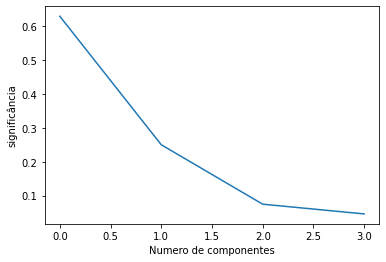

In [679]:
plt.plot(np.abs(lambdas)/np.sum(lambdas))
plt.xlabel('Numero de componentes')
plt.ylabel('significância') 
plt.show()

Outro meio, que inclusive será utilizado nesse exemplo, é pelo Critério de Kaiser que, busca encontrar a maior variância comum à todas as variáveis. Portanto, escolheremos as variáveis que tenham autovalores maiores que 1, ou seja, expliquem pelo menos, mais que uma variável.  

In [680]:
for i in range(len(lambdas)):
  if lambdas[i] > 1:
    print(lambdas[i])

2.5190526567139173
1.00040806979414


##Cargas Fatorias

Otimo, descobrimos que dois componentes se enquadram na regra. vamos extrair então as cargas fatorias desse componentes. Mas para que servem isso?

As *Carga Fatorias* correspondem às correlações de Pearson entre os fatores e as variáveis originais para elaboração do PCA. 

Elas são calculadas através da multiplicação dos autovetores pela raiz dos autovalores (desvio padrão). Faremos o cálculo pelo desvio, por ser uma medida padronização de mais fácil entendimento.

In [681]:
cargas_fatorias=np.array(vs) * np.sqrt(np.array(lambdas))

In [682]:
cargas_fatorias= cargas_fatorias[:,0:2]

In [683]:
relatorioCargas=pd.DataFrame(cargas_fatorias[:,0:2])
relatorioCargas.columns=['PCA1','PCA2']
relatorioCargas

,PCA1,PCA2
0,-0.895350,0.006729
1,-0.934374,0.048756
2,0.042265,0.998940
3,-0.917910,-0.010198


Veja que (lembre-se de como interpretar o sinal ao analisar uma matriz de correlações) nosso 1 componente explica sobre quase todas as notas, exceto à da coluna 2, que é bem explicada pelo componente 2.

##Comunalidades

As comunalidades representam à variância total compartilhada de cada uma das variáveis originais com todos os fatores extraídos.

Para visualizar isso, vamos elevar nossos desvios novamente ao ², para termos a variância e somar nossos fatores.

In [684]:
relatorioComunalidades=pd.DataFrame(relatorioCargas['PCA1']**2+relatorioCargas['PCA2']**2)
relatorioComunalidades.columns=['Comunalidade']
relatorioComunalidades

,Comunalidade
0,0.801697
1,0.875433
2,0.999668
3,0.842663


Veja só, a maioria das nossas variáveis estão sendo bem explicadas por nossos 2 fatores. 

Agora vamos unir nossos relatórios e ter uma visão geral dos resultados:

In [685]:
relatorioComunalidadesCargas=relatorioCargas
relatorioComunalidadesCargas['Comunalidade']=relatorioComunalidades
relatorioComunalidadesCargas

,PCA1,PCA2,Comunalidade
0,-0.895350,0.006729,0.801697
1,-0.934374,0.048756,0.875433
2,0.042265,0.998940,0.999668
3,-0.917910,-0.010198,0.842663


Agora, vamos aproveitar que temos 2 componentes e podemos plotar nossos resultados num gráfico de pontos simples. 


In [686]:
fig=px.scatter(relatorioCargas, x='PCA1', y='PCA2')  
fig.show()

Veja como a representação fica mais clara agora. Nesse gráfico, 3 notas são muito mais explicadas pelo eixo x (nosso componente PCA1), enquanto um é mais explicado pelo eixo y (nosso componente PCA2)

##Scores Fatoriais

Os scores dizem respeito a coeficientes que relacionam determinado fator com as variáveis originais.

Vamos utilizar nossos autovalores e autovetores para elaborar um ranking desses alunos. Para isso, para fins de equivalência, iremos multiplicar nossos autovetores pelos desvios padrões de nossos autovalores. 

Depois iremos transpor os resultados gerados, lembre-se que estamos multiplicando uma matriz por um vetor.

In [687]:
scoresFatorias=((vs)/np.sqrt(lambdas)).T

In [688]:
scores=pd.DataFrame({'PCA1':scoresFatorias[0],'PCA2':scoresFatorias[1]})
scores

,PCA1,PCA2
0,-0.355431,0.006726
1,-0.370923,0.048736
2,0.016778,0.998533
3,-0.364387,-0.010194


Agora criaremos duas variáveis principais, cada uma multiplicará os valores padronizados da nossa base de dados com os respectivos scores de cada fator.

OBS: No Python, iremos adicionar uma etapa adicional:

* Multiplicar por -1 a soma gerada pelo fator 1. Veja que os scores fatoriais das observações mais fortes nele são negativas. O que pode afetar nosso ranking.  


In [689]:
F1=pd.DataFrame([x*scores['PCA1'] for x in data_scaler])
F2=pd.DataFrame([x*scores['PCA2'] for x in data_scaler])

F1.columns=['notas_financas','notas_custos', 'notas_marketing', 'notas_atuarias']
F2.columns=['notas_financas','notas_custos', 'notas_marketing', 'notas_atuarias']

F1['fator1']=F1.sum(axis=1)*-1
F2['fator2']=F2.sum(axis=1)

Perfeito, criamos nossos fatores para cada observação da base de dados. Vamos unificar isso na base original agora. 

(Obs: o reset é para que seja possível adicionar nosso fatores sem identificar os fatores como indices)

In [690]:
data['fator1']=F1.reset_index()['fator1']
data['fator2']=F2.reset_index()['fator2']

##Calculando a variância compartilhada

Como cada autovalor explica um pouco a variação de cada variável (parece redundante, mas aprofunde no tema e verá que não é), iremos pegar agora o % de quanto cada autovalor explica. Para isso basta pegar o autovalor gerado e dividir pelo somatório dos autovalores

In [691]:
variancia_compartilhada=lambdas/sum(lambdas)
variancia_compartilhada

array([0.62976316, 0.25010202, 0.07443301, 0.0457018 ])

##Ranking Final

Otimo, como estamos usando 2 fatores, iremos multiplicar cada tipo de fator pela sua respectiva variância compartilhada, a fim de obter a pontuação de cada pessoa. 

In [692]:
data['pontuacao']=(data['fator1'] *variancia_compartilhada[0]) +(data['fator2']* variancia_compartilhada[1])

Vamos agora adicionar novamente a variável de estudante, agora como index da base de dados e ordenar do aluno com maior nota para a menor 

In [693]:
data['estudante']=estudante
data.set_index('estudante',inplace=True)
data.sort_values(by='pontuacao',ascending=False)

,notas_financas,notas_custos,notas_marketing,notas_atuarias,fator1,fator2,pontuacao
estudante,,,,,,,
Adelino,9.9,10.00,10.0,10.0,1.923789,1.632212,1.619751
Renata,7.7,10.00,10.0,10.0,1.672124,1.627449,1.460070
CecÃ­lia,9.8,10.00,7.0,10.0,1.930235,0.567608,1.357551
Felipe,8.7,10.00,9.0,9.0,1.646752,1.278895,1.356918
Giulia,6.2,10.00,10.0,10.0,1.500534,1.624202,1.351197
...,...,...,...,...,...,...,...
Ester,0.6,1.94,3.0,3.2,-1.311668,-1.004380,-1.077237
Carolina,3.1,2.00,2.0,2.0,-1.185495,-1.347676,-1.083638
Elaine,3.1,2.00,2.0,2.0,-1.185495,-1.347676,-1.083638


Veja como ficou fácil para classificar os alunos agora.

Esse é só um exemplo dos benefícios da análise de PCA no dia a dia.